# Style-Emotion Analysis

How do reported emotions and artistic styles correlate in the different
datasets available?

List of datasets considered:

- A) MART
- B) ~~ArtPedia~~
- C) WikiArt Emotions
- D) Artemis

In [12]:
import pathlib
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# ROOT = pathlib.Path.cwd().parent
ROOT = pathlib.Path('/mnt/HDD/DATA/')
ROOT.exists()

True

## A) MART

When loading the data, since it is formatted in Excel-like shape, we miss
information regarding the specific artwork each annotation is referred to,
keeping only the first row as column name.

This is not important in this very case, where we exclusively seek to draw
the shape of the distribution of emotional scores.

In [2]:
data_path = ROOT / 'MART' / 'Data' / 'MART_DATA.ods'
mart = pandas.read_excel(data_path, engine='odf', sheet_name='ALL_DATA')
score_cols = set(list(mart)) - {'AGE', 'GENDER', 'MUSEUMS/YEAR', 'SUBJECT',
                                'media', 'varianza'}
emotion = mart.dropna()[list(score_cols)].values.ravel()
mart

,MUSEUMS/YEAR,GENDER,AGE,SUBJECT,ppt1_001,ppt1_002,ppt1_003,ppt1_004,ppt1_005,ppt1_006,...,ppt1_093,ppt1_094,ppt1_095,ppt1_096,ppt1_097,ppt1_098,ppt1_099,ppt1_100,media,varianza
0,2.5,f,60.0,a1,4,5,4,6,6,6,...,6,5,3,4,4,5,6,5,4.80,1.414141
1,15.0,f,58.0,a12,3,3,4,4,5,3,...,2,3,1,3,1,2,4,2,3.78,2.213737
2,20.0,f,34.0,a16,2,5,5,5,5,4,...,3,4,2,3,3,4,5,4,4.10,1.343434
3,3.0,m,25.0,a21,2,2,4,5,5,5,...,4,5,2,1,4,4,2,5,3.86,1.939798
4,1.0,f,55.0,a23,3,4,4,3,5,5,...,3,2,4,4,5,5,5,2,3.85,1.967172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,10.0,f,43.0,a77,4,5,6,7,5,6,...,7,7,6,5,7,5,5,5,5.31,1.751414
104,55.0,f,52.0,a82,3,4,4,5,6,4,...,3,4,5,4,4,6,6,4,5.05,1.441919
105,1.0,m,57.0,a87,1,4,4,7,4,4,...,5,6,5,7,7,6,5,1,5.38,3.046061
106,2.0,f,56.0,a92,2,1,3,5,1,3,...,5,6,4,6,7,5,2,4,3.65,2.290404


### Distribution of raw scores, all dataset

<AxesSubplot: ylabel='Density'>

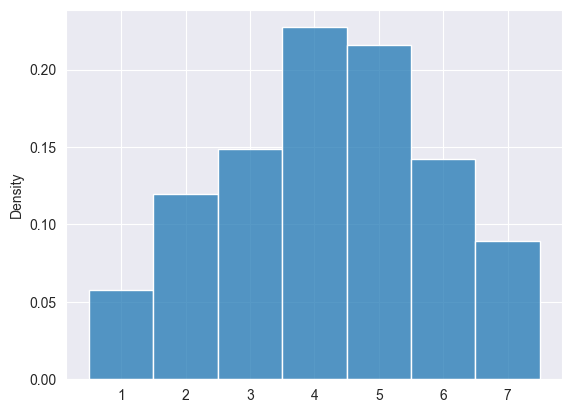

In [3]:
sns.histplot(data=emotion, stat='density', bins=7, discrete=True)

### Distribution of average scores, per picture

<AxesSubplot: xlabel='media', ylabel='Density'>

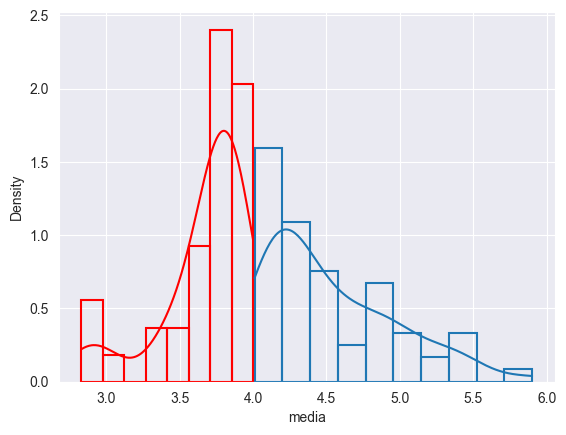

In [4]:
positive = mart[mart['media'] > 4]['media']
negative = mart[mart['media'] <= 4]['media']
sns.histplot(data=positive, stat='density', bins=10, kde=True, fill=False)
sns.histplot(data=negative, stat='density', bins=8, kde=True, color='r',
             fill=False)

## B) WikiArt-Emotions

Since every annotator displays several emotions to each sample, and since
this set of emotions is not shared by any other dataset, we convert through
a majority voting procedure every set of emotions into a binary label
indicating whether the feeling experienced by the annotator is either
positive, negative or neutral.

In [215]:
data_path = ROOT / 'WikiArt-Emotions' / 'WikiArt-annotations.csv'
wikiart = pandas.read_csv(data_path)
wikiart = wikiart[wikiart[r"Art (image+title) #5: Is painting"] == "yes"]
wikiart

,Worker ID,ImageOnly #1: ID,ImageOnly #1: Emotions,ImageOnly #1: Other Emotions,ImageOnly #2: ID,ImageOnly #2: Emotions,ImageOnly #2: Other Emotions,ImageOnly #3: ID,ImageOnly #3: Emotions,ImageOnly #3: Other Emotions,...,Art (image+title) #4: Other Emotions,Art (image+title) #4: Is painting,Art (image+title) #4: Face/body,Art (image+title) #4: Art rating,Art (image+title) #5: ID,Art (image+title) #5: Emotions,Art (image+title) #5: Other Emotions,Art (image+title) #5: Is painting,Art (image+title) #5: Face/body,Art (image+title) #5: Art rating
0,worker_1,57728030edc2cb3880f07e00,surprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anticipation,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,trust,NaN,yes,none,3
1,worker_2,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,trust\r\nlove\r\narrogance\r\nanticipation,NaN,577284aeedc2cb3880fe8ca7,fear\r\nregret\r\nsadness\r\nshame,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,anger\r\nfear,NaN,yes,none,2
2,worker_3,57728030edc2cb3880f07e00,disgust,NaN,57726f0dedc2cb3880b94625,happiness,NaN,577284aeedc2cb3880fe8ca7,fear\r\ndisagreeableness,NaN,...,NaN,yes,body,1,57728703edc2cb3880061039,disgust,NaN,yes,none,0
3,worker_4,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,happiness\r\noptimism,NaN,577284aeedc2cb3880fe8ca7,sadness,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,surprise,NaN,yes,none,2
4,worker_5,57728030edc2cb3880f07e00,anticipation\r\nsurprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anger\r\nsadness,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,love\r\nanger,NaN,yes,none,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,worker_37,577283c4edc2cb3880fbce85,surprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility,NaN,577286deedc2cb3880058258,happiness,NaN,...,NaN,yes,none,-2,577286deedc2cb3880058258,happiness\r\nanticipation,NaN,yes,none,2
12681,worker_101,577283c4edc2cb3880fbce85,fear\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\ngratitude\r\nlove,NaN,577286deedc2cb3880058258,shame,NaN,...,NaN,yes,none,-1,577286deedc2cb3880058258,shame,NaN,yes,none,0
12682,worker_15,577283c4edc2cb3880fbce85,anticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility\r\nhappiness\r\nlove,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,NaN,yes,face\r\nbody,0,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,yes,none,0
12683,worker_79,577283c4edc2cb3880fbce85,happiness\r\nanticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,gratitude\r\nhumility\r\nhappiness\r\nagreeabl...,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,NaN,yes,none,1,577286deedc2cb3880058258,other,n,yes,none,0


In [222]:
emotion_to_label = {
    'positive': {"gratitude", "thankfulness", "indebtedness", "happiness",
                 "calmness", "pleasure", "ecstasy", "humility", "modesty",
                 "unpretentiousness", "simplicity", "love", "affection", "optimism",
                 "hopefulness", "confidence", "trust", "admiration", "respect",
                 "dignity", "honor"},
    'negative': {"anger", "annoyance", "rage", "arrogance", "vanity", "hubris", "conceit",
                 "disgust", "dislike", "indifference", "hate", "fear",
                 "anxiety", "vulnerability", "terror", "pessimism", "cynicism","lack of confidence",
                 "regret", "guilt", "remorse", "sadness", "pensiveness",
                 "loneliness", "grief", "shame", "humiliation", "disgrace"},
    'neutral': {"agreeableness", "acceptance", "submission", "compliance",
                "anticipation", "interest", "curiosity", "suspicion",
                "vigilance", "disagreeableness", "defiance", "conflict",
                "strife", "surprise", "surrealism", "amazement",
                "confusion", "shyness", "self-consciousness", "reserve",
                "reticence", "neutral", "other"}
}

def majority_vote(emotion_responses: str, translation: dict) -> str:
    """ Convert a list of emotions separated by `\r\n` into a binary label.

    Args:
        emotion_responses: Emotions annotated in a sample.
        translation: How each emotion translates into
        positive/negative/neutral.

    Returns:
        label denoting overall positive/negative/neutral response.
    """
    ems = emotion_responses.replace('\r\n', ',').split(',')
    binary_emotions = []
    for em in ems:
        for label in translation.keys():
            if em in translation[label]:
                binary_emotions.append(label)
    return max(set(binary_emotions), key=binary_emotions.count)

emotion_cols = sorted([s for s in list(wikiart) if ': Emotions' in s])
for c, col in enumerate(emotion_cols):
    new_col = col + '- Binary'
    wikiart[new_col] = wikiart[col].apply(majority_vote,
                                          translation=emotion_to_label)
wikiart


,Worker ID,ImageOnly #1: ID,ImageOnly #1: Emotions,ImageOnly #1: Other Emotions,ImageOnly #2: ID,ImageOnly #2: Emotions,ImageOnly #2: Other Emotions,ImageOnly #3: ID,ImageOnly #3: Emotions,ImageOnly #3: Other Emotions,...,ImageOnly #1: Emotions- Binary,ImageOnly #2: Emotions- Binary,ImageOnly #3: Emotions- Binary,ImageOnly #4: Emotions- Binary,ImageOnly #5: Emotions- Binary,TitleOnly #1: Emotions- Binary,TitleOnly #2: Emotions- Binary,TitleOnly #3: Emotions- Binary,TitleOnly #4: Emotions- Binary,TitleOnly #5: Emotions- Binary
0,worker_1,57728030edc2cb3880f07e00,surprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anticipation,NaN,...,neutral,positive,neutral,neutral,neutral,neutral,positive,neutral,positive,positive
1,worker_2,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,trust\r\nlove\r\narrogance\r\nanticipation,NaN,577284aeedc2cb3880fe8ca7,fear\r\nregret\r\nsadness\r\nshame,NaN,...,neutral,positive,negative,positive,negative,negative,positive,neutral,positive,neutral
2,worker_3,57728030edc2cb3880f07e00,disgust,NaN,57726f0dedc2cb3880b94625,happiness,NaN,577284aeedc2cb3880fe8ca7,fear\r\ndisagreeableness,NaN,...,negative,positive,negative,negative,negative,negative,negative,negative,positive,positive
3,worker_4,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,happiness\r\noptimism,NaN,577284aeedc2cb3880fe8ca7,sadness,NaN,...,neutral,positive,negative,neutral,neutral,negative,neutral,neutral,positive,positive
4,worker_5,57728030edc2cb3880f07e00,anticipation\r\nsurprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anger\r\nsadness,NaN,...,neutral,positive,negative,neutral,negative,negative,negative,positive,positive,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,worker_37,577283c4edc2cb3880fbce85,surprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility,NaN,577286deedc2cb3880058258,happiness,NaN,...,neutral,positive,positive,positive,neutral,positive,positive,neutral,neutral,positive
12681,worker_101,577283c4edc2cb3880fbce85,fear\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\ngratitude\r\nlove,NaN,577286deedc2cb3880058258,shame,NaN,...,negative,positive,negative,positive,neutral,positive,positive,neutral,neutral,neutral
12682,worker_15,577283c4edc2cb3880fbce85,anticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility\r\nhappiness\r\nlove,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,neutral,positive,neutral,positive,neutral,positive,positive,neutral,neutral,positive
12683,worker_79,577283c4edc2cb3880fbce85,happiness\r\nanticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,gratitude\r\nhumility\r\nhappiness\r\nagreeabl...,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,neutral,positive,neutral,positive,neutral,positive,positive,neutral,neutral,neutral


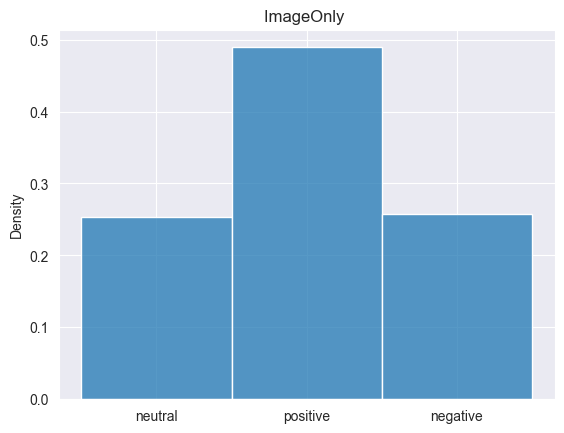

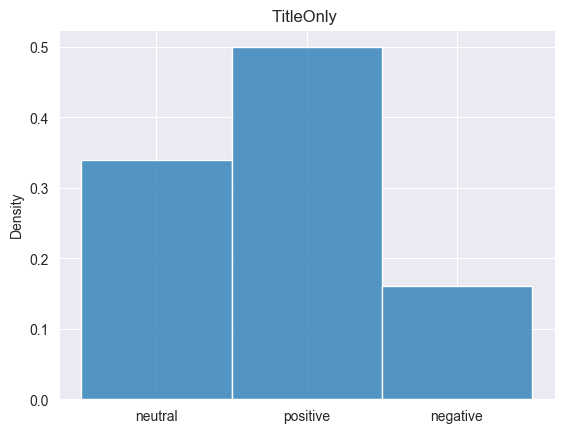

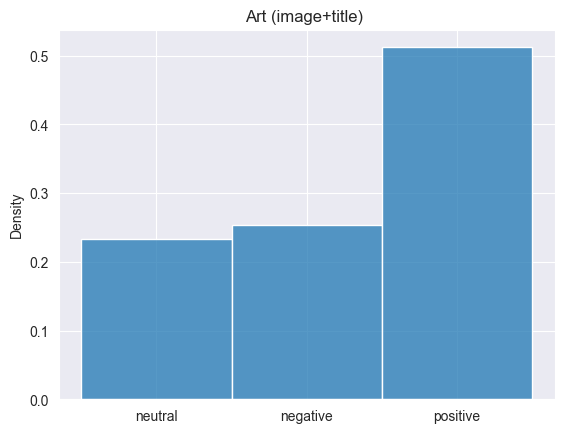

In [234]:
image_cols = "ImageOnly #{}: Emotions- Binary"
title_cols = "TitleOnly #{}: Emotions- Binary"
multimodal_cols = "Art (image+title) #{}: Emotions- Binary"

for modality in [image_cols, title_cols, multimodal_cols]:
    subset = wikiart[[modality.format(i) for i in range(1, 6)]].values.ravel()
    sns.histplot(data=subset, discrete=True, stat='density')
    plt.title(modality.split("#")[0])
    plt.show()

## C) Artemis

In [5]:
artemis = pandas.read_csv(ROOT / "ARTEMIS" / "artemis_official_data" /
                          "official_data" / "artemis_dataset_release_v0.csv")
artemis

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8


### Global distribution of Emotions

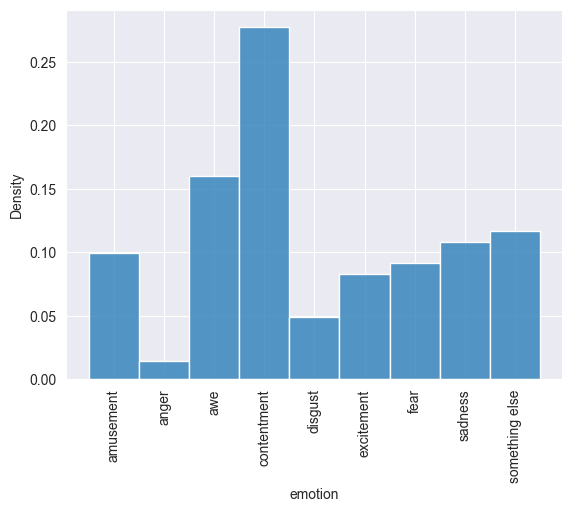

In [10]:
# A) histogram
alphabetical = sorted(artemis['emotion'].unique())
artemis['emotion'] = pandas.Categorical(artemis['emotion'], alphabetical)
sns.histplot(data=artemis['emotion'], discrete=True, stat='density')
plt.xticks(rotation=90)
plt.show()

### Global distribution of Artistic Styles

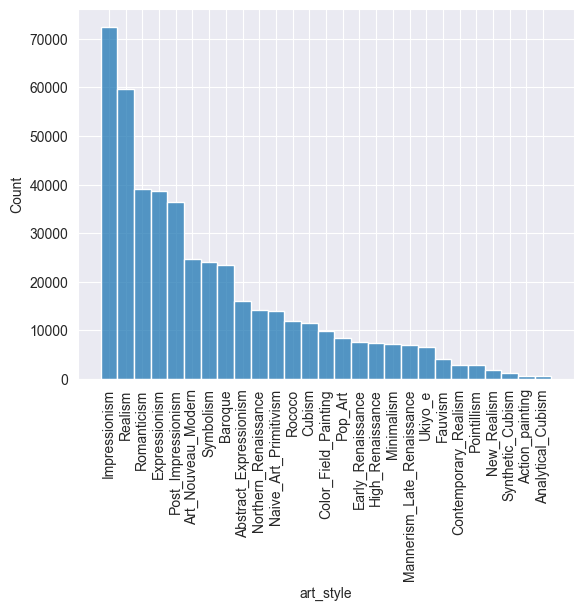

In [85]:
style_freq = artemis['art_style'].value_counts().index
artemis['art_style'] = pandas.Categorical(artemis['art_style'], style_freq)
sns.histplot(data=artemis['art_style'], discrete=True)
plt.xticks(rotation=90)
plt.show()

### Ablation analysis of relationship Art Style - Emotions

/tmp/ipykernel_681054/933460494.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_681054/933460494.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_681054/933460494.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6

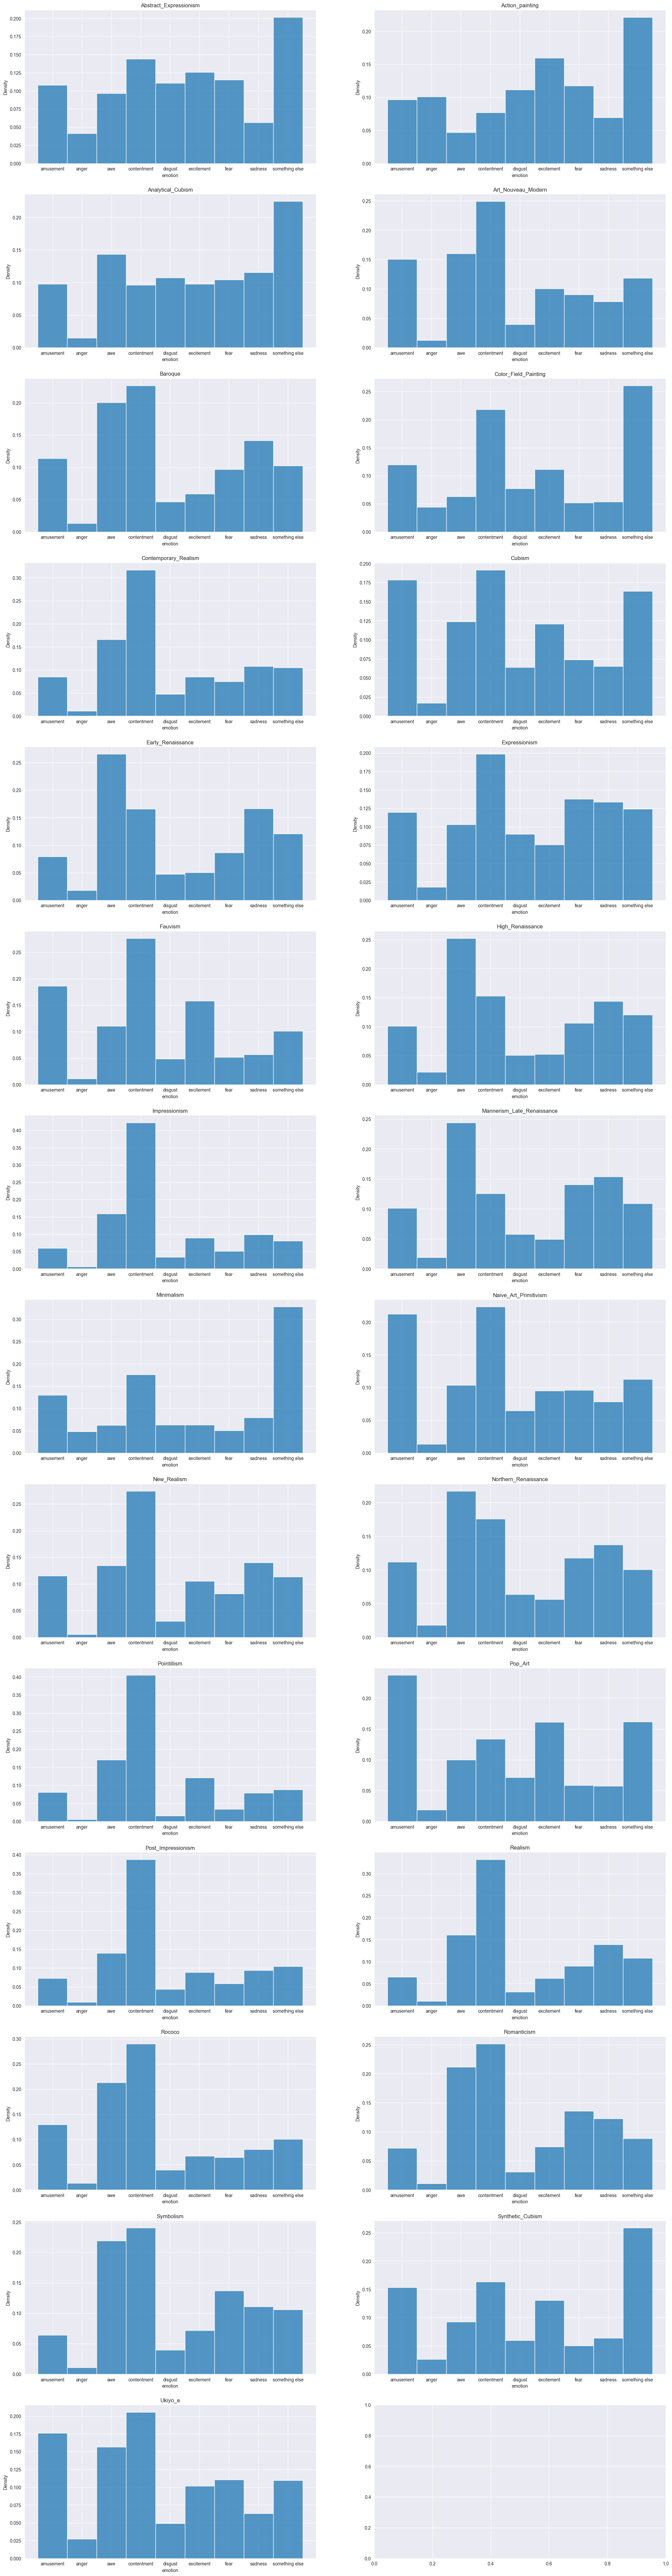

In [43]:
styles = sorted(list(artemis['art_style'].unique()))
fig, axs = plt.subplots(14, 2, figsize=(25, 100))
row = -1
for s, style in enumerate(styles):
    artemis_style = artemis[artemis['art_style'] == style]
    artemis_style['emotion'] = pandas.Categorical(artemis_style['emotion'],
                                                  alphabetical)
    col = 0 if s % 2 == 0 else 1
    row = row if s % 2 != 0 else row + 1
    sns.histplot(artemis_style,
                 x='emotion',
                 discrete=True,
                 stat='density',
                 ax=axs[row, col])
    axs[(row, col)].set_title(style)
plt.show()


/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_681054/2129204161.py:12: UserWarning:

FixedForma

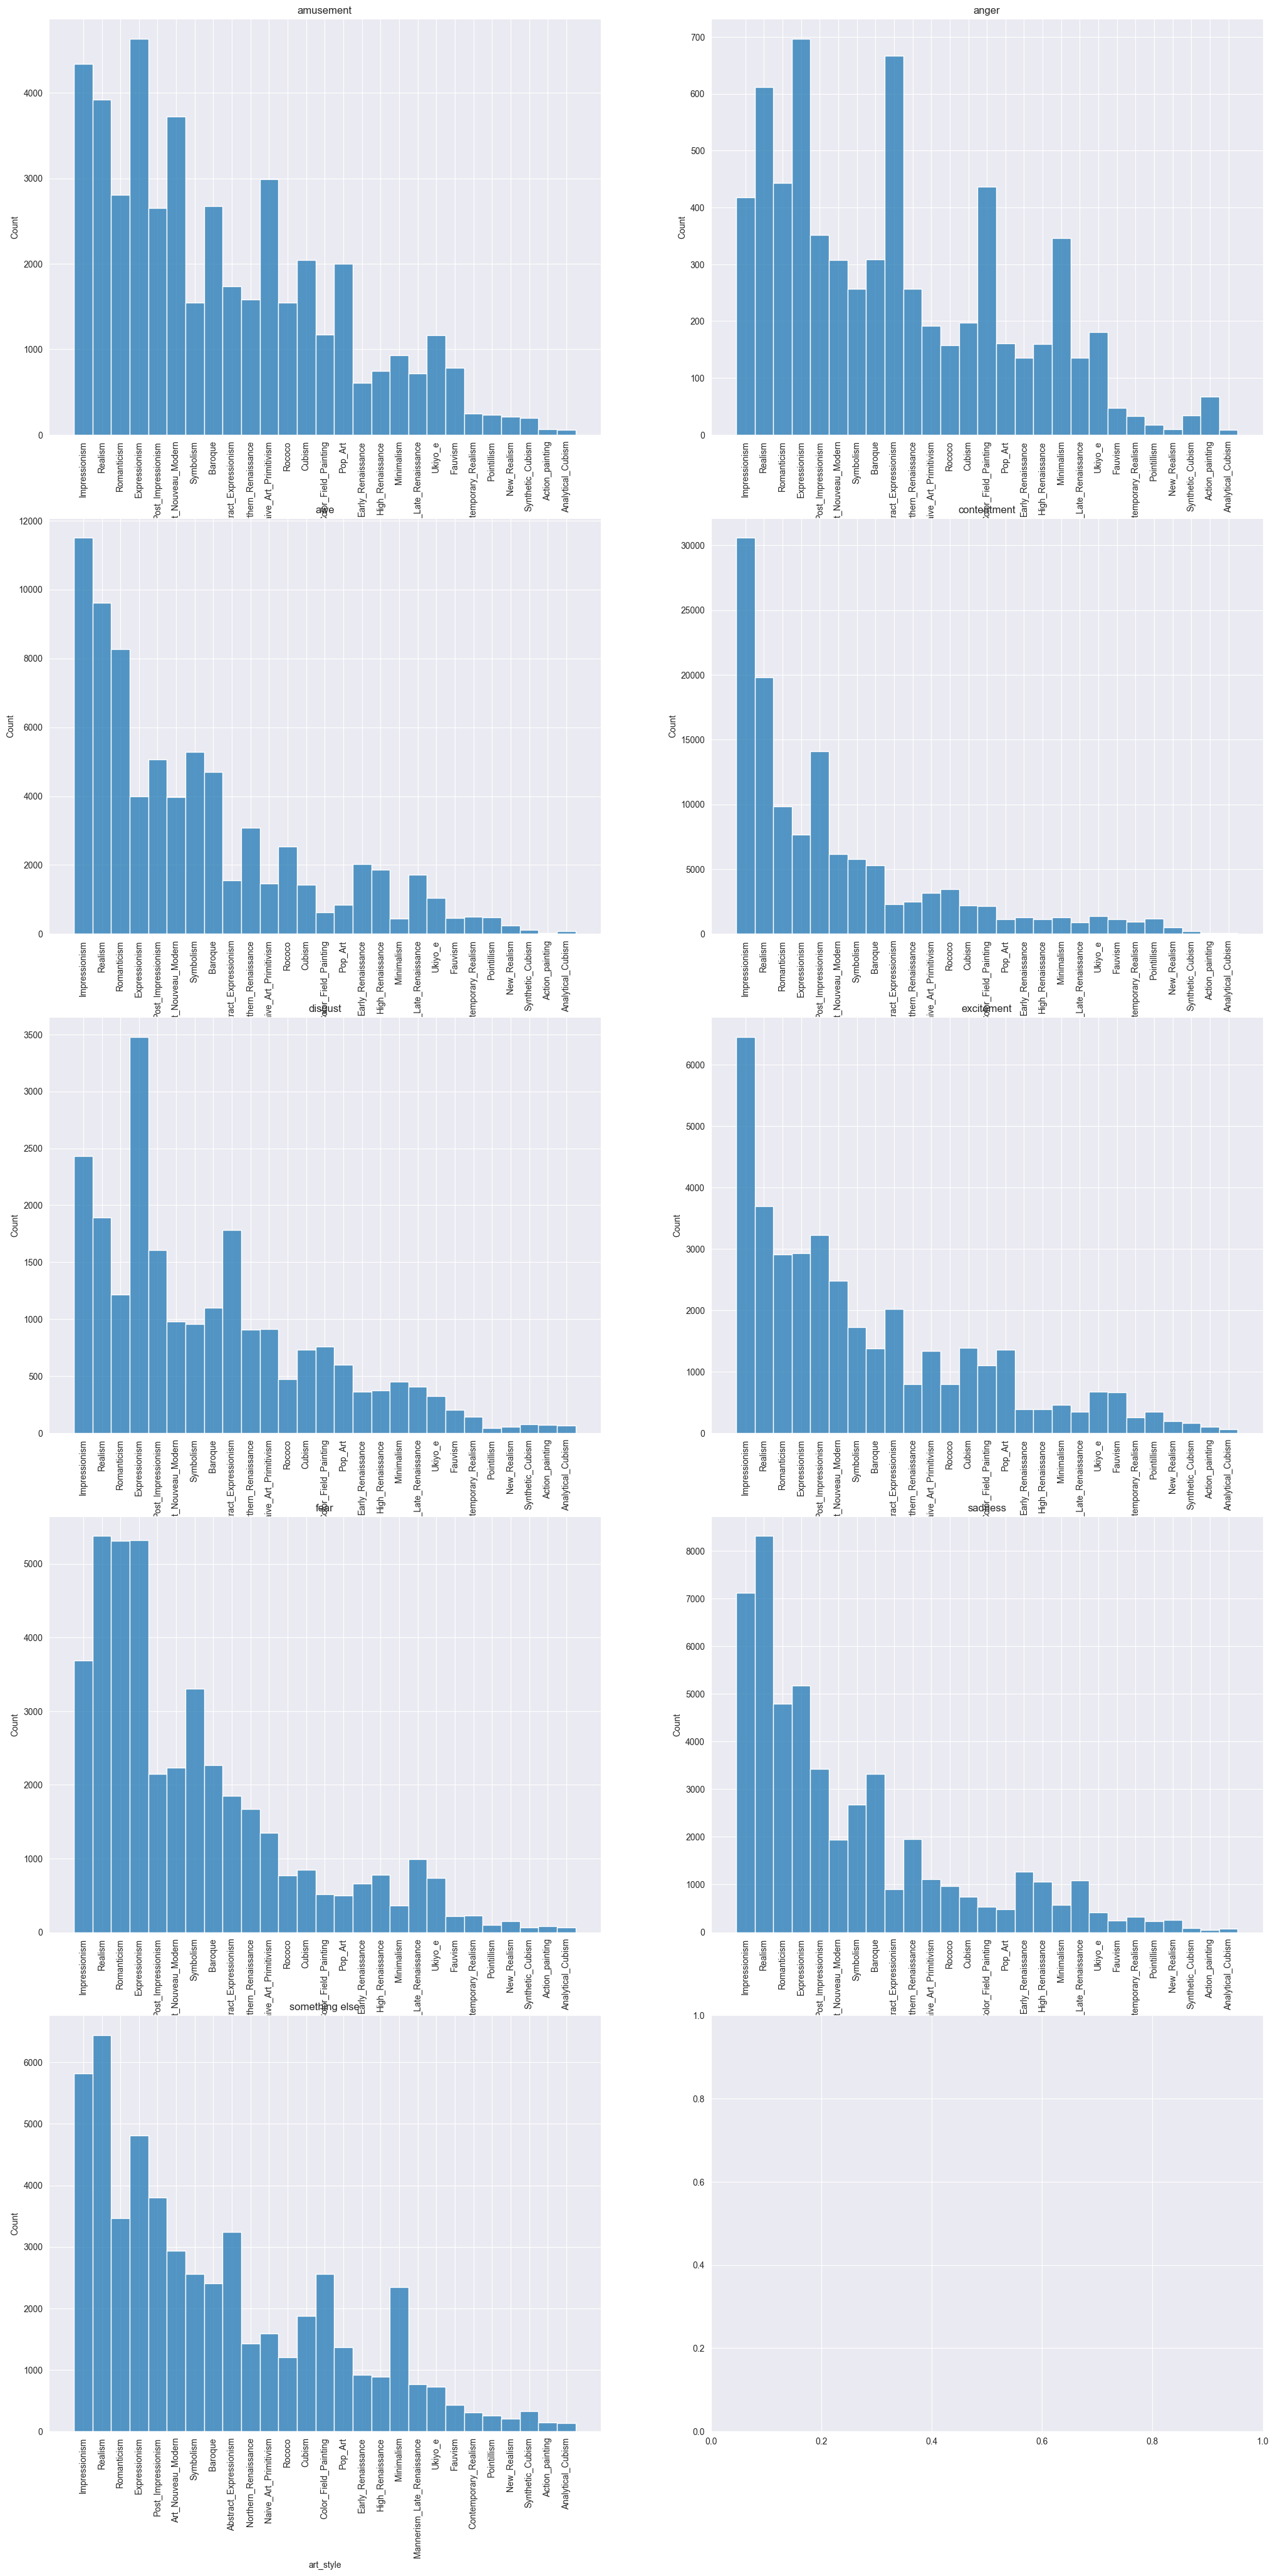

In [101]:
emotions = sorted(list(artemis['emotion'].unique()))
fig, axs = plt.subplots(5, 2, figsize=(25, 50))
row = -1
for e, emotion in enumerate(emotions):
    artemis_e = artemis[artemis['emotion'] == emotion]
    col = 0 if e % 2 == 0 else 1
    row = row if e % 2 != 0 else row + 1
    sns.histplot(artemis_e['art_style'],
                 discrete=True,
                 ax=axs[row, col])
    axs[(row, col)].set_title(emotion)
    axs[(row, col)].set_xticklabels(style_freq, rotation=90)

fig.show()
